In [128]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.stats import normaltest

In [42]:
df = pd.read_csv('Documents/Datasets/alerting.csv')

In [43]:
df = df.fillna(0)

In [105]:
def metrics(df: pd.DataFrame) -> pd.DataFrame:
    df['CPM'] = (df.spend_usd / df.impressions * 1000).round(2)
    df['CPC'] = (df.spend_usd / df.clicks).round(2)
    df['CPI'] = (df.spend_usd / df.installs).round(2)
    df.replace([np.inf, -np.inf], 0, inplace=True)
    return df

In [107]:
data = df.groupby(['business_dt', 'offer', 'network']) \
    .agg({'spend_usd':'sum','impressions':'sum','clicks':'sum','installs':'sum'}).reset_index()

In [108]:
data = metrics(data)

In [109]:
data = data.fillna(0)

In [110]:
data_vkads = data[data.network == 'VKADS']

In [101]:
scaler = StandardScaler()

In [125]:
plt_vk = data_vkads[data_vkads.CPM > 0]

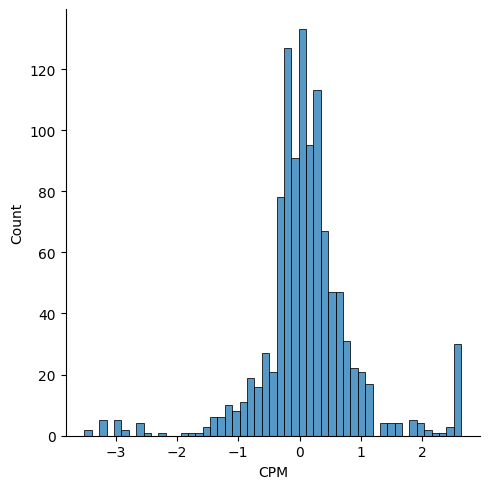

In [127]:
sns.displot(np.log(plt_vk.CPM))

In [131]:
plt_vk[plt_vk.business_dt < '2024-09-10'].CPM.mean()

np.float64(1.6845846153846153)

In [138]:
plt_vk[plt_vk.business_dt < '2024-09-'].CPM.mean()

np.float64(1.6494444444444445)